# EDA Prior to Unsupervised Clustering

Learn the EDA steps that can be helpful prior to creating an unsupervised clustering model.

## Introduction

- When we want to understand underlying groups for a set of observations but don’t know what the group labels should be, we often turn to unsupervised clustering. 
- If we are planning to fit an unsupervised machine learning model, we often want to explore questions such as:
    - How many groups are there?
    - How might those groups differ?
- In this article, we will demonstrate an exploratory process for beginning to address these questions.

## Data

- Let’s say that you are opening a restaurant and want to be sure to offer a “wide variety” of wines. You get this dataset of chemical differences between types of wines from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/dataset/109/wine) with traits such as:
    - Alcohol
    - Malic acid
    - Ash
    - Alcalinity of ash
    - Magnesium
    - Total phenols
    - Flavanoids
    - Nonflavanoid phenols
    - Proanthocyanins
    - Color intensity
    - Hue
    - OD280/OD315 of diluted wines
    - Proline
- You want to use this information to try to categorize the wine into different groups to ensure that the wines that you decide to buy for the restaurant have a good amount of variety. 
- You want the wines within each group to be similar to each other, and wines in different groups to be less similar.
-  You have no idea how many groups there are or what the group labels should be. 
- So instead, you want to see if the given information has natural groupings based on the characteristics that you have collected data about.

<br>

- In order to get started, you might need to answer some of the following questions:
    - How many different kinds of wine are there?
    - How do those wine types differ?
- For some unsupervised clustering algorithms, you’ll need to specify the number of groups ahead of time. 
- Also, different types of algorithms can handle different kinds of groupings more efficiently, so it can be helpful to visualize the shapes of the clusters. 
- For example, k-means algorithms are good at identifying data groups with spherical shapes because they are based on principles of equal variance and distance between data points:  
    <img src="Images/cluster_spherical.svg" width="600">
- On the other hand, Principal Component Analysis algorithms and BIRCH methods are better at identifying elongated groupings:  
    <img src="Images/cluster_elongated.svg" width="600">
- There is no method that is the best in every situation. 
- It takes some investigating to know which method will be best for a given set of data.

## Prepare the Data

- As usual, before we analyze the data, we should go through the process of previewing the data:

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("wines.csv")
df.head()

,class,Alocohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


- Before continuing with our analysis, we will want to clean and standardize the data, as well as ensure that the variables are coded appropriately as numerical values.

## Pairplot to look for clusters

- A pairplot of the variables is a good way to look for univariate and bivariate clusters.

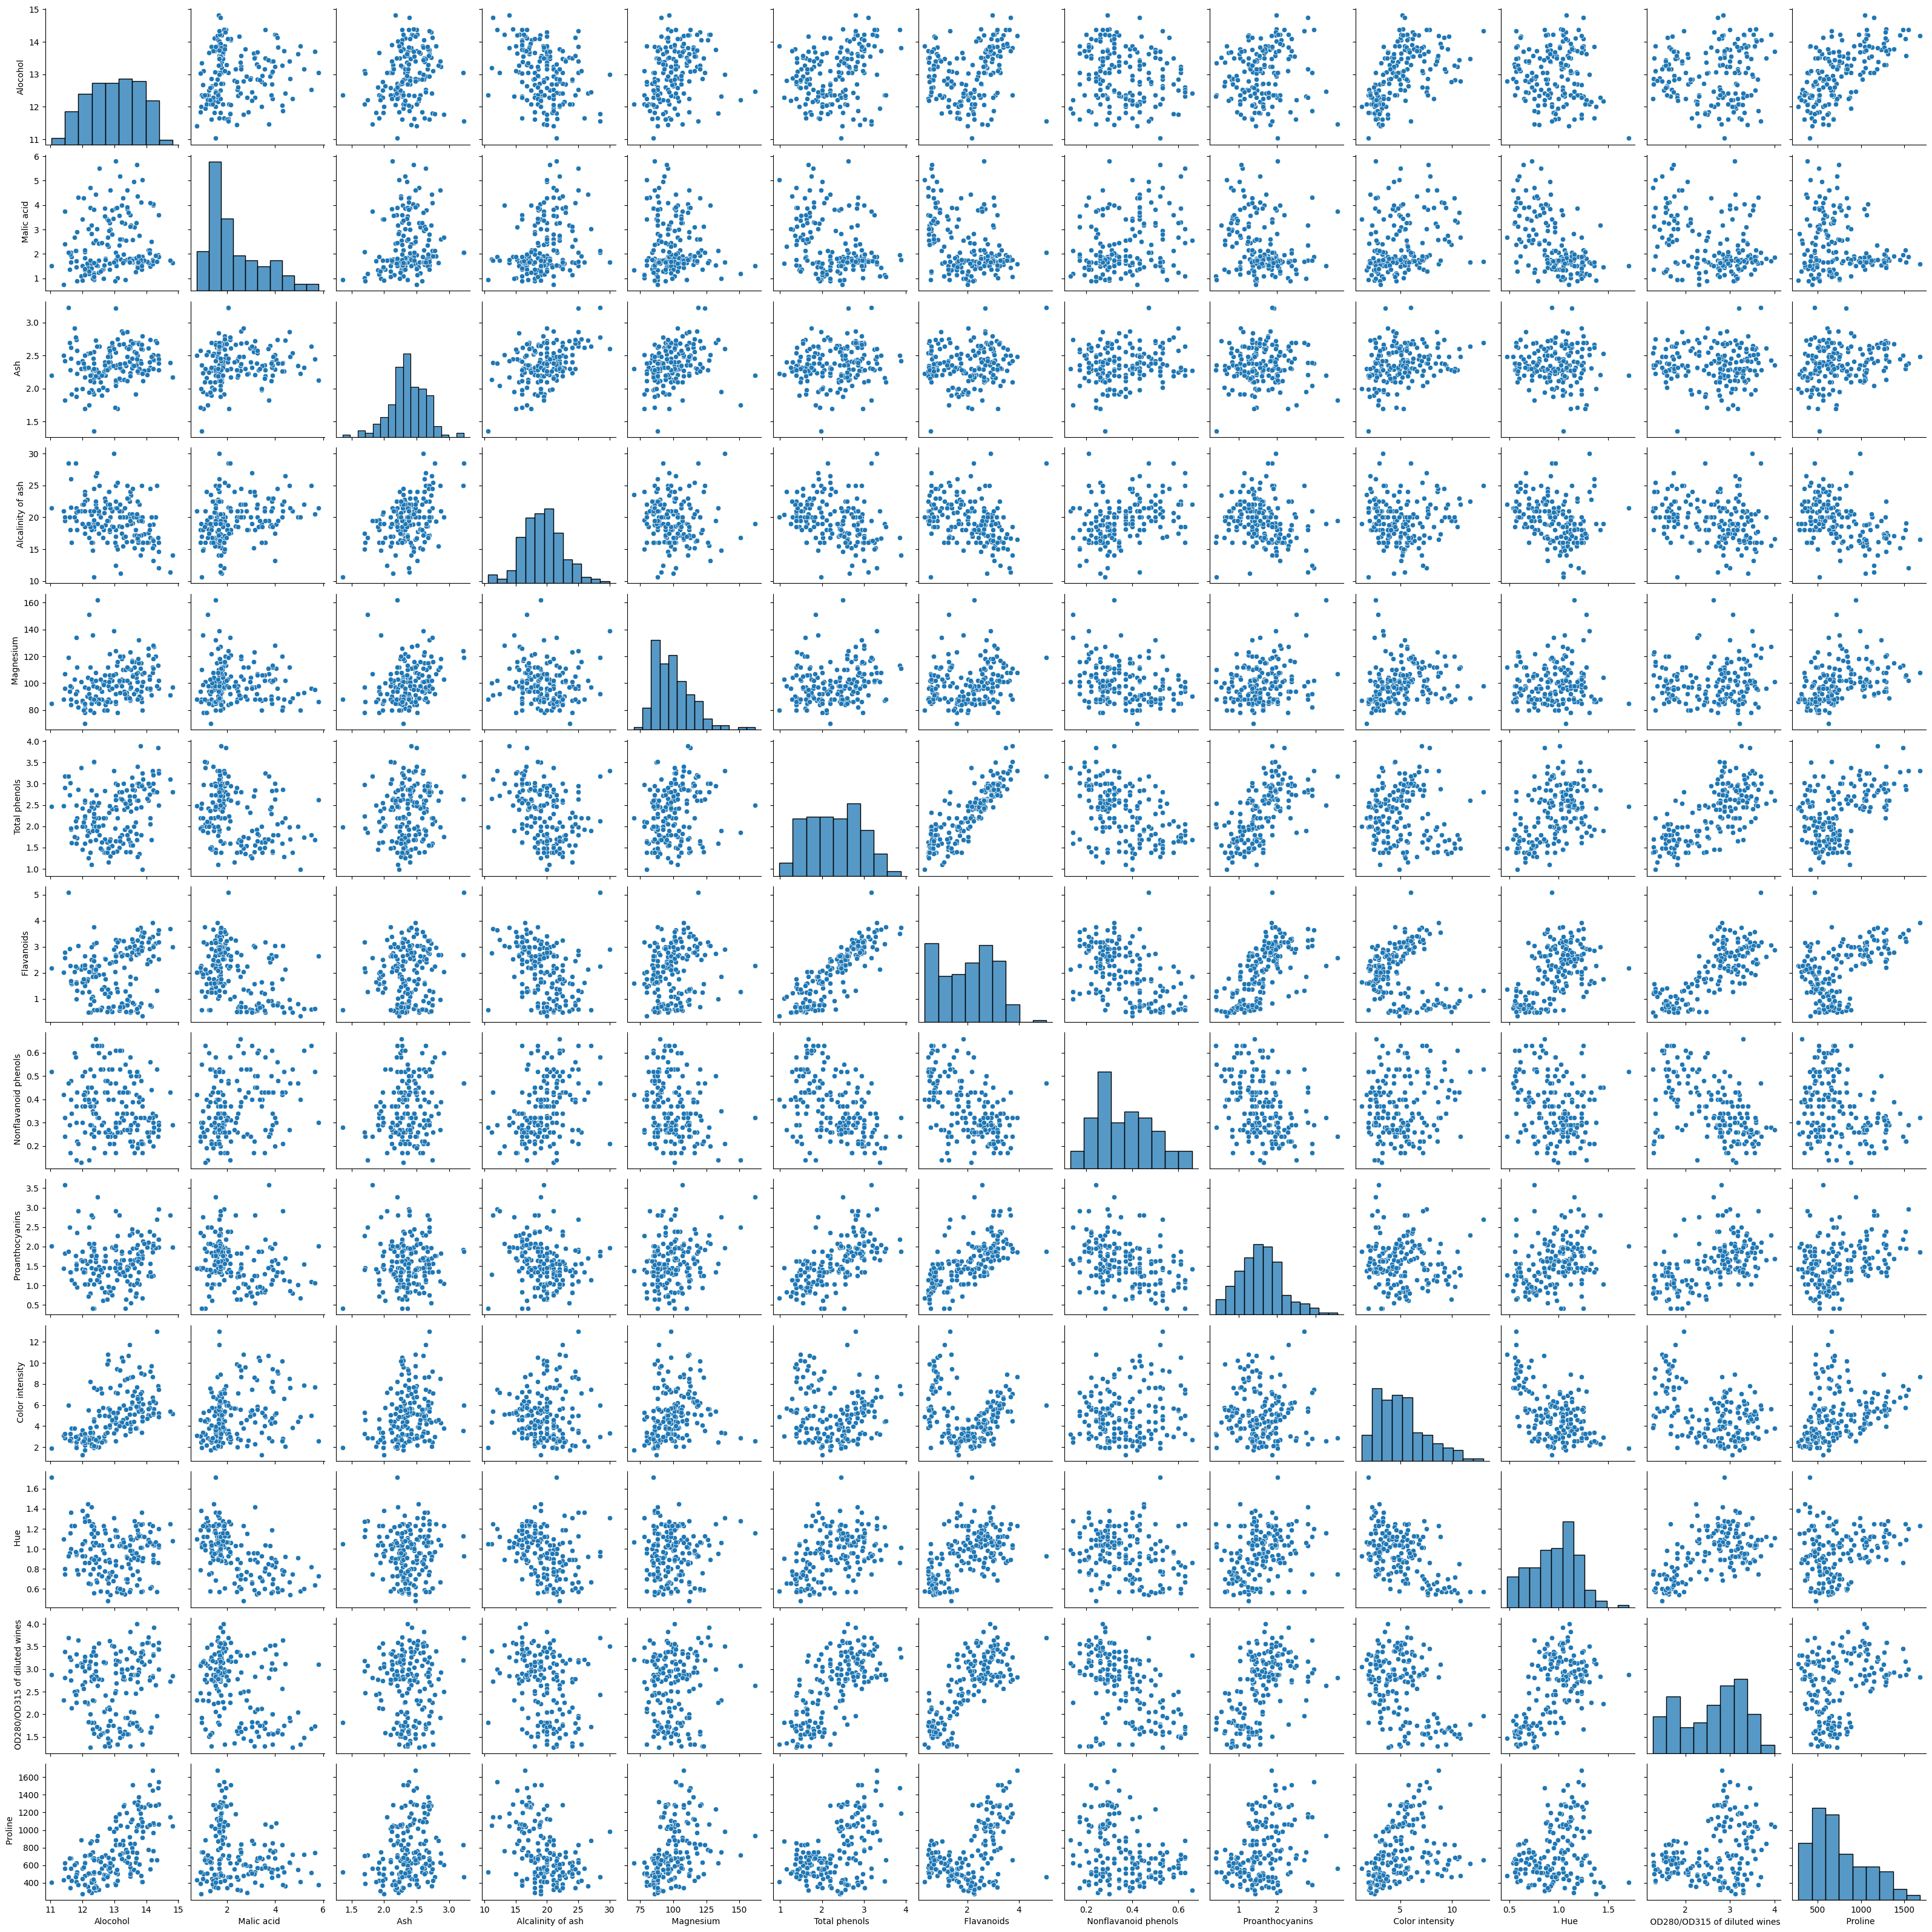

In [3]:
df_temp = df.drop(columns=['class'])
sns.pairplot(df_temp)
plt.show()

- Looking at the histograms along the diagonal, some variables have what appear to be bimodal distributions, as indicated by the two peaks. Let’s take a closer look at a couple of them:

<Axes: xlabel=' Flavanoids', ylabel='Count'>

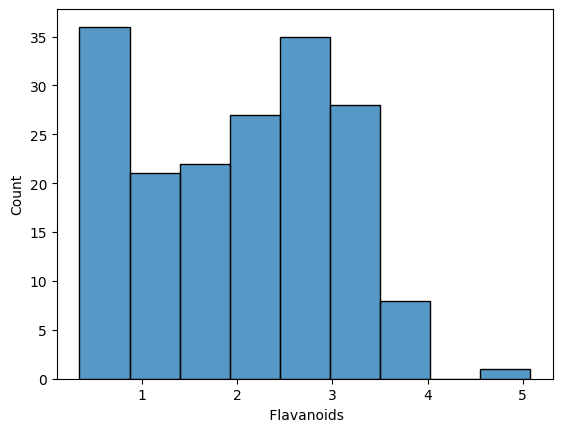

In [11]:
sns.histplot(df, x=' Flavanoids')

- In this histogram of `Flavanoids`, we can see a peak at the very left-hand side as well as between 2 and 3. 
- This is evidence that there could be two groups of wines with respect to `Flavanoids` (low and high flavanoid wines).

<Axes: xlabel=' OD280/OD315 of diluted wines', ylabel='Count'>

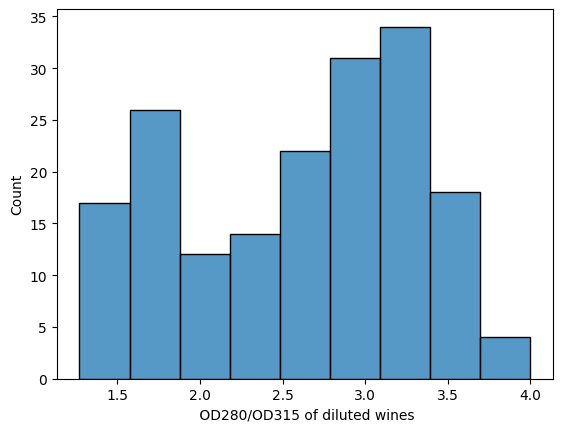

In [13]:
sns.histplot(df, x=' OD280/OD315 of diluted wines')

- Similarly, the variable of OD280 has two distinct peaks, one between 1.5 and 2, and another between 2.5 and 3.5. 
- Thus, we have evidence of at least two wine groups based on OD280 as well.

<br>


- Looking at the rest of the pair plot, it is difficult to see relationships in the scatterplots when there are this many variables.
- The task of looking at each scatterplot can be tedious, so we have selected three bivariate plots to highlight:

<Axes: xlabel=' Flavanoids', ylabel=' Color intensity'>

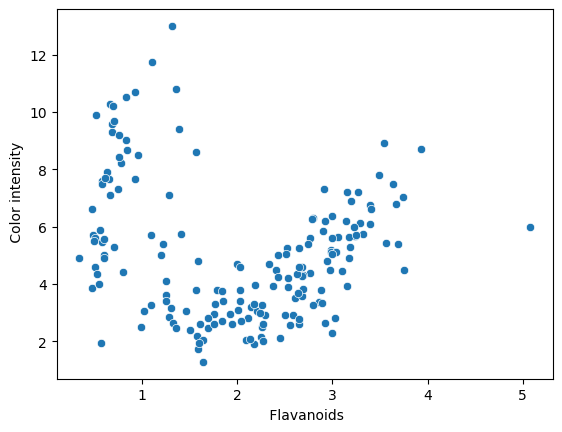

In [15]:
sns.scatterplot(data=df, x=' Flavanoids', y=' Color intensity')

- This first scatterplot is between `Flavanoids` and `Color_Intensity`. 
- In this plot, we see at least two clear elongated clusters.

<Axes: xlabel=' Proline', ylabel=' Color intensity'>

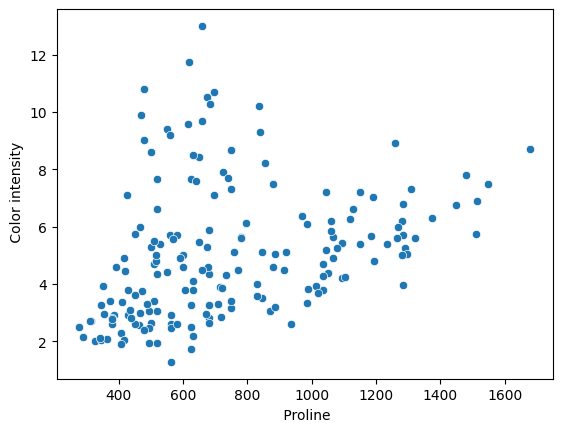

In [16]:
sns.scatterplot(data=df, x=' Proline', y=' Color intensity')

- This second scatterplot is between `Proline` and `Color_Intensity` and appears to have at least three different clusters.

<Axes: xlabel='Alocohol', ylabel=' OD280/OD315 of diluted wines'>

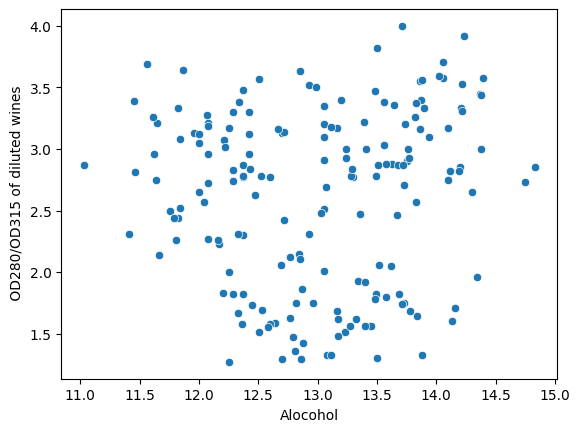

In [17]:
sns.scatterplot(data=df, x='Alocohol', y=' OD280/OD315 of diluted wines')

- This final scatterplot is between `Alcohol` and `OD280` and contains three distinct round blobs of points.

<br>

- Based on these plots we can conclude that there are probably at least three different types of wine in this dataset and that `Flavanoids`, `Color_Intensity`, `Alcohol`, and `OD280` may be particularly important in distinguishing those groups.

## Feature reduction for EDA

- The first pair plot with all of the variables was difficult to inspect, but we can reduce the number of dimensions by transforming our data using PCA. 
- Let’s look at the pair plot of the first few principal components:  
    <img src="Images/transformed_data_pairplot.svg" width="800">
- Now, instead looking at a 13 by 13 pair plot, we can zoom in on a 5 by 5 plot that includes all of the original features. 
- In fact, a single plot can be used to visualize relationships between all of the original features at once, not just two at a time. 
- We can see that there is some distinction between groups in clusters 1 and 2, as well as 2 and 4. 
- We also see three fairly clear groups in the plot of component 1 vs. 2. 
- But what does this mean about our original features?

<br>

- We can look at the weights for each of these components and see which features were most highly weighted in components 1 and 2 (which seem to cluster into three clear groups):
    | Feature | Comp1 | Comp2 | Comp3 | Comp4 | Comp5 |
    |---------|-------|-------|-------|-------|-------|
    | Alcohol | 0.144329 | -0.483652 | -0.207383 | -0.017856 | -0.265664 |
    | Malic_Acid | -0.245188 | -0.224931 | 0.089013 | 0.536890 | 0.035214 |
    | Ash | -0.002051 | 0.626224 | 0.626224 | -0.214176 | -0.143025 |
    | Ash_Alcanity | -0.239320 | 0.010591 | 0.612080 | 0.060859 | 0.066103 |
    | Magnesium | 0.141992 | -0.299634 | 0.130757 | -0.351797 | 0.727049 |
    | Total_Phenols | 0.394661 | -0.065040 | 0.146179 | 0.198068 | -0.149318 |
    | Flavanoids | 0.422934 | 0.003360 | 0.150682 | 0.152295 | -0.109026 |
    | Nonflavanoid_Phenols | -0.298533 | -0.0287790 | 0.170368 | -0.203301 | -0.500703 |
    | Proanthocyanins | 0.313429 | -0.039302 | 0.149454 | 0.399057 | 0.136860 |
    | Color_Intensity | -0.088617 | -0.529996 | -0.137306 | 0.065926 | -0.076437 |
    | Hue | 0.296715 | 0.279235 | 0.085222 | -0.427771 | -0.173615 |
    | OD280 | 0.376167 | 0.164496 | 0.166005 | 0.184121 | -0.101161 |
    | Proline | 0.286752 | -0.364903 | -0.126746 | -0.232071 | -0.157869 |
- We are looking for the highest weighted feature for each component of interest. 
- For component 1, this would be `Flavanoids`, component 2, `Color_Intensity`, and so on. 
- These may be particularly important features to include in our model.

<br>

- We can also use the transformed data to visually inspect the groups that are produced by other supervised machine learning methods. 
- For example, here is the same pair plot of the transformed data, but the points are colored by the outcome of a k-means analysis with 3 groups:
    <img src="Images/transformed_data_pairplot_kmeans.svg" width="800">
- We can see here that the groupings we saw in the PCA-transformed data align with those produced by the k-means model.
- Specifically, we see that the pair plot of components 1 and 2 separates the k-means clusters particularly well.
- We can also look at the same bivariate scatterplots from earlier, with the added k-means results:  
    <img src="Images/bivariate_plots1_color-1.svg" width="800">  
    <img src="Images/bivariate_plots2_color-1.svg" width="800">  
    <img src="Images/bivariate_plots3_color-1.svg" width="800">
- We suspected that these features would be useful in clustering our wines, and now we see that the k-means model is producing groups based on these features. 
- This is also useful for explaining the k-means model to potential stake-holders.
- For example, we can say that the “purple” group produced by our k-means model is characterized by lower than average amounts of flavanoids and higher than average color intensity.

## Conclusion

- EDA before and after fitting unsupervised clustering algorithms is extremely helpful for checking model assumptions, choosing an algorithm, determining the number of groups, and explaining the results to potential stake-holders.